In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
file_path = 'data/JOG_monthly.csv'
df = pd.read_csv(file_path, delimiter=';')
df['Date'] = pd.to_datetime(df['THBL'], format='%Y%m')
df.set_index('Date', inplace=True)
df = df.asfreq('MS')
scaler = MinMaxScaler()
df['GWH_JUAL'] = scaler.fit_transform(df[['GWH_JUAL']].dropna())
df.drop(columns='THBL', inplace=True)
print(df.head())

            GWH_JUAL
Date                
2015-01-01  0.094838
2015-02-01  0.000000
2015-03-01  0.115178
2015-04-01  0.115373
2015-05-01  0.162993


In [10]:
ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)
ts_train.shape, ts_test.shape

((90, 1), (23, 1))

In [14]:
model = ExponentialSmoothing(ts_train, seasonal_periods=12, trend='add', seasonal='add')
model_fit = model.fit()

In [15]:
n_forecast = len(ts_test)
forecast = model_fit.forecast(n_forecast)

In [17]:
def mean_absolute_percentage_error(targets, preds):
    targets = np.array(targets)
    preds = np.array(preds)
    return np.mean(np.abs((targets - preds) / targets)) * 100

def symmetric_mean_absolute_percentage_error(targets, preds):
    targets = np.array(targets)
    preds = np.array(preds)
    return np.mean(2.0 * np.abs(preds - targets) / (np.abs(targets) + np.abs(preds))) * 100

Metrics for Test Data:
MAE  : 0.1378
MSE  : 0.0271
R²   : -0.2381
MAPE : 20.6927%
SMAPE: 23.5503%


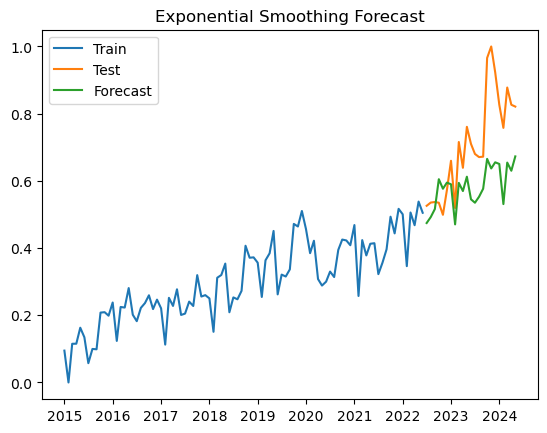

In [18]:
mae = mean_absolute_error(ts_test, forecast)
mse = mean_squared_error(ts_test, forecast)
r2 = r2_score(ts_test, forecast)
mape = mean_absolute_percentage_error(ts_test, forecast)
smape = symmetric_mean_absolute_percentage_error(ts_test, forecast)

print("Metrics for Test Data:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MAPE : {mape:.4f}%")
print(f"SMAPE: {smape:.4f}%")

# Visualisasi hasil prediksi
plt.plot(ts_train.index, ts_train, label='Train')
plt.plot(ts_test.index, ts_test, label='Test')
plt.plot(ts_test.index, forecast, label='Forecast')
# plt.fill_between(ts_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()